# Assignment 3 - Decision Tree

Saana Vallius

6.2.2018

### Imports

In [231]:
import pandas as pd
import numpy as np
import graphviz
from sklearn import svm
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from IPython.display import IFrame  
from sklearn.tree import export_graphviz

### Read the data

In [232]:
df = pd.read_csv('phishing.csv', sep=';')

#Number of missing values
print(np.sum(np.isnan(df)))

#Data types
print(df.dtypes)

#Shape of data
print(df.shape)

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWindow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [233]:
#Min values
print(np.min(df))

#Max values
print(np.max(df))

having_IP_Address             -1
URL_Length                    -1
Shortining_Service            -1
having_At_Symbol              -1
double_slash_redirecting      -1
Prefix_Suffix                 -1
having_Sub_Domain             -1
SSLfinal_State                -1
Domain_registeration_length   -1
Favicon                       -1
port                          -1
HTTPS_token                   -1
Request_URL                   -1
URL_of_Anchor                 -1
Links_in_tags                 -1
SFH                           -1
Submitting_to_email           -1
Abnormal_URL                  -1
Redirect                       0
on_mouseover                  -1
RightClick                    -1
popUpWindow                   -1
Iframe                        -1
age_of_domain                 -1
DNSRecord                     -1
web_traffic                   -1
Page_Rank                     -1
Google_Index                  -1
Links_pointing_to_page        -1
Statistical_report            -1
Result    

In [234]:
#Take a general look at the data
df.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


The dataset consists of 11055 samples of 31 attributes. There are no missing values and the type for all the columns is int64 as promised. All in all, all of the dataset seems to be in great condition.

The last column 'Result' is 1 for phishing sites and -1 for legitime ones. All the values in the column range from -1 to 1 except for the 'Redirect' column where the range is from 0 to 1. The data is available from: https://archive.ics.uci.edu/ml/datasets/phishing+websites

In [235]:
#Save the column names (exclude the response column)
column_names = df.columns.get_values()
column_names = column_names[:30]

In [236]:
#Extract the results (response variable column) from the explanatory variable columns
response = df['Result']
explanatory = df.drop('Result', axis=1)

In [237]:
#Create the classifier
classifier = tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(explanatory,response)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

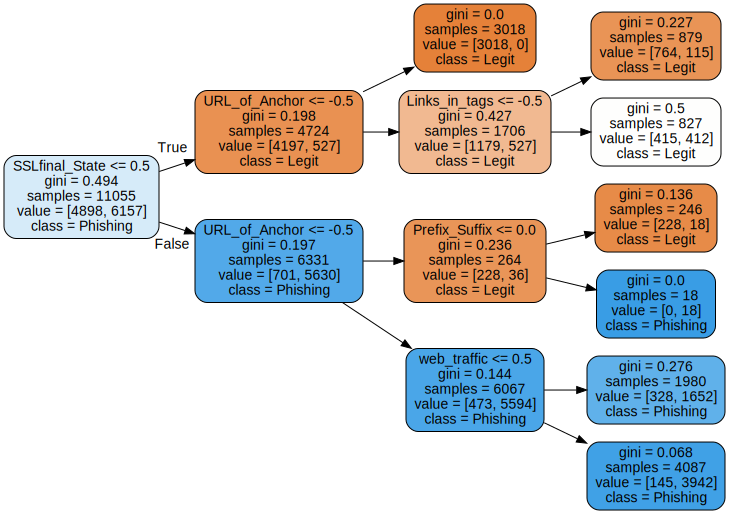

In [238]:
# Visualize the results
dot_data = tree.export_graphviz(classifier, out_file=None, 
                                filled=True, rounded=True, 
                                feature_names=column_names, rotate=True,
                                class_names=['Legit','Phishing'])

graph = graphviz.Source(dot_data)
graph

In [239]:
#Make a prediction
prediction = classifier.predict(explanatory)

#Produce a confusion matrix
cm = confusion_matrix(response, prediction)
print("Confusion matrix:\n",cm)

#Cross-validating the results
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, explanatory, response, cv=5)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("\nAccuracy calculated from the training set = %.3f" % (accuracy))

print("\nAccuracy calculated by cross-validation: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

print(classification_report(response, prediction, target_names=['Legit', 'Phishing']))

Confusion matrix:
 [[4425  473]
 [ 545 5612]]

Accuracy calculated from the training set = 0.908

Accuracy calculated by cross-validation: 0.93 (+/- 0.01)

             precision    recall  f1-score   support

      Legit       0.89      0.90      0.90      4898
   Phishing       0.92      0.91      0.92      6157

avg / total       0.91      0.91      0.91     11055



The accuracy of the model is a quite satisfyingly close to ~91%. During testing, with a larger model (up to 7 layers) the accuracy increased up to 93%. The cross-validation score of 93% shows that the model is underfitting yet useful. The final size of the tree was determined to be this by comparing the rate of complexity and accuracy. As required, the tree is small yet useful.

### Written directions to handle the sites

1. If SSL certificate of an HTTPS site is from a trusted source and the age of the sertificate is more than one year old, it's legit.

If a site doesn't fall into the previous category:
    
2. If the URL anchor percentage in the URL is more than 67%, it's phishing.

If a site doesn't fall into the previous category:
    3. If there are no extra prefix suffices, it's legit.
    4. If there are, it's phishing.

    